# Guided Project: Star Wars Survey

## Overview 2/9

In [1]:
#Read the data set into a dataframe.
import pandas as pd
import numpy
star_wars=pd.read_csv("star_wars.csv",encoding="ISO-8859-1")

#Explore the data by entering star_wars.head(10). Look for any strange values in the columns and rows.
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [2]:
#Review the column names with star_wars.columns.
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [3]:
#Remove any rows where RespondentID is NaN.
print(star_wars["RespondentID"].value_counts(sort=True,dropna=False))

#Check before removal
print(star_wars.shape)

#Remove
star_wars=star_wars[star_wars["RespondentID"].notnull()]

#Check after removal
print(star_wars.shape)

 3.291092e+09    1
 3.290409e+09    1
 3.290347e+09    1
 3.290351e+09    1
 3.288558e+09    1
 3.290360e+09    1
 3.290365e+09    1
 3.290372e+09    1
 3.290375e+09    1
 3.290380e+09    1
 3.290387e+09    1
 3.290399e+09    1
 3.291392e+09    1
 3.290402e+09    1
 3.290409e+09    1
 3.290412e+09    1
 3.290418e+09    1
 3.290345e+09    1
 3.290337e+09    1
 3.289919e+09    1
 3.290330e+09    1
 3.290263e+09    1
 3.290266e+09    1
 3.290407e+09    1
 3.290280e+09    1
 3.290662e+09    1
 3.290287e+09    1
 3.290289e+09    1
 3.290296e+09    1
 3.290298e+09    1
                ..
 3.288591e+09    1
 3.290655e+09    1
 3.292719e+09    1
 3.289446e+09    1
 3.292731e+09    1
 3.290597e+09    1
 3.289532e+09    1
 3.291023e+09    1
 3.292765e+09    1
 3.289986e+09    1
 3.289598e+09    1
 3.290651e+09    1
 3.292664e+09    1
 3.292654e+09    1
 3.292581e+09    1
 3.289553e+09    1
 3.289726e+09    1
 3.288640e+09    1
 3.292565e+09    1
 3.290639e+09    1
 3.292573e+09    1
 3.292583e+0

## Cleaning and Mapping Yes/No Columns

In [4]:
#Convert the Have you seen any of the 6 films in the Star Wars franchise? column to the Boolean type.
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))

#Define mapping for conversion
yes_no={
    "Yes":True,
    "No":False
}

#Convert 
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"]=star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)

#Check conversion
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


In [5]:
#Convert the Do you consider yourself to be a fan of the Star Wars film franchise? column to the Boolean type.
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

#Convert
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"]=star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

#Check Conversion
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna=False))

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Cleaning and Mapping Checkbox Columns

In [6]:
#Convert each column above so that it only contains the values True and False.
star_wars.columns[3:9]

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

In [7]:
#Check unique values before conversion
column_name=star_wars.columns[3:9]

for i in column_name:
    print(star_wars[i].unique())

['Star Wars: Episode I  The Phantom Menace' nan]
['Star Wars: Episode II  Attack of the Clones' nan]
['Star Wars: Episode III  Revenge of the Sith' nan]
['Star Wars: Episode IV  A New Hope' nan]
['Star Wars: Episode V The Empire Strikes Back' nan]
['Star Wars: Episode VI Return of the Jedi' nan]


In [8]:
#Define mapping for conversion
seen_no={
    'Star Wars: Episode I  The Phantom Menace':True,
    'Star Wars: Episode II  Attack of the Clones':True,
    'Star Wars: Episode III  Revenge of the Sith':True,
    'Star Wars: Episode IV  A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True,
    numpy.NaN:False
}

#Convert Columns
for i in column_name:
    star_wars[i]=star_wars[i].map(seen_no)

In [9]:
#Check unique values after conversion
for i in column_name:
    print(star_wars[i].unique())

[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]


In [10]:
#Print current column names
print(star_wars.columns)

#Rename
star_wars=star_wars.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
    'Unnamed: 4':"seen_2",
    'Unnamed: 5':"seen_3",
    'Unnamed: 6':"seen_4",
    'Unnamed: 7':"seen_5",
    'Unnamed: 8':"seen_6",    
})

#Print changes column names
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [11]:
for i in range(6):
    print(star_wars["seen_"+str(i+1)].unique())

[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]


## Cleaning the Ranking Columns

In [12]:
#Check dtype of columns before conversion
print(star_wars.info())

#Convert each of the columns above to a float type.
star_wars[star_wars.columns[9:15]]=star_wars[star_wars.columns[9:15]].astype(float)

#Check dtype of columns after conversion
print(star_wars.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null bool
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
seen_1                                                                                                                                           1186 non-null bool
seen_2                                                                                                                                           1186 non-null bool
seen_3                                                               

In [13]:
#Print current column names
print(star_wars.columns)

#Conversion
star_wars=star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':"ranking_1",
    'Unnamed: 10':"ranking_2", 
    'Unnamed: 11':"ranking_3", 
    'Unnamed: 12':"ranking_4", 
    'Unnamed: 13':"ranking_5",
    'Unnamed: 14':"ranking_6",
})

#Print column names after conversion
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

## Finding the Highest-Ranked Movie

In [14]:
#Compute the mean of each of the ranking columns from the last screen.
mean=star_wars[star_wars.columns[9:15]].mean()
print(mean,mean.shape)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64 (6,)


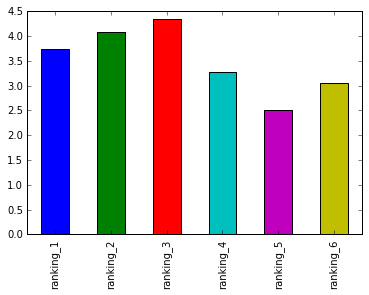

In [15]:
#Make a bar chart of each ranking.
import matplotlib.pyplot as plt
%matplotlib inline

mean.plot.bar()

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.

## Finding the Most Viewed Movie

In [16]:
#Compute the sum of each of the seen columns
sum_seen_columns=star_wars[star_wars.columns[3:9]].sum()
print(sum_seen_columns)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


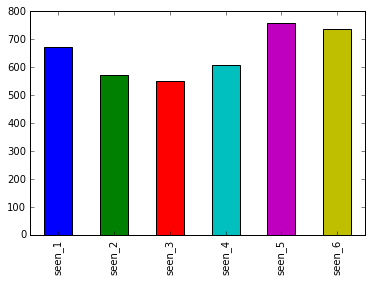

In [17]:
#Make a bar chart of each ranking.
sum_seen_columns.plot.bar()

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.

## Exploring the Data by Binary Segments

In [18]:
#Split the data into two groups based on one of the binary columns above.
males=star_wars[star_wars["Gender"]=="Male"]
females=star_wars[star_wars["Gender"]=="Female"]

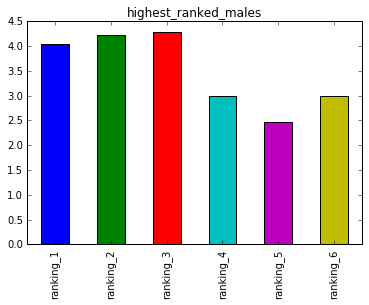

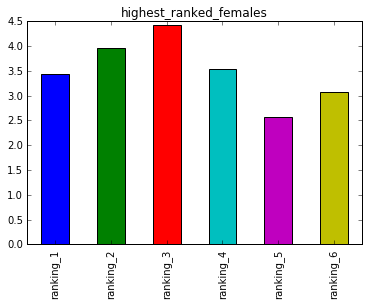

In [22]:
#Redo the two previous analyses (find the most viewed movie and the highest-ranked movie) separately for each group, and then compare the results.
#Highest Ranked
highest_ranked_males=males[males.columns[9:15]].mean()
highest_ranked_females=females[females.columns[9:15]].mean()
highest_ranked_males.plot.bar()
plt.title("highest_ranked_males")
plt.show()
highest_ranked_females.plot.bar()
plt.title("highest_ranked_females")
plt.show()

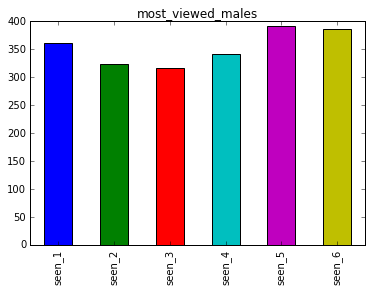

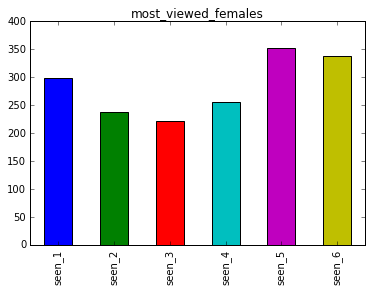

In [23]:
#Most Viewed
most_viewed_males=males[males.columns[3:9]].sum()
most_viewed_females=females[females.columns[3:9]].sum()
most_viewed_males.plot.bar()
plt.title("most_viewed_males")
plt.show()
most_viewed_females.plot.bar()
plt.title("most_viewed_females")
plt.show()

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.